![image.png](https://i.imgur.com/a3uAqnb.png)

# 🚕 Simple Linear Regression Lab - KAUST Academy
---
### 🎯 **Lab Objectives:**
1. **Learn to predict numbers** using simple linear regression 📈
2. **Understand relationships** between variables in real data 🔗
3. **Build your first prediction model** step by step 🏗️
4. **Make taxi fare predictions** using distance and time ⏱️
5. **Evaluate how good** your predictions are 📊

---
### 📚 **What You'll Learn:**
- **Linear Regression Basics:** Drawing the best line through data points
- **Prediction Models:** Teaching computers to make smart guesses
- **Real-World Application:** Predicting taxi fares like Uber or Careem!
- **Model Evaluation:** Checking if your predictions are accurate
- **Data Relationships:** Understanding what affects taxi prices

### 🌟 **Real-World Impact:**
Linear regression is used everywhere:
- 🚕 **Ride-sharing apps** predicting trip costs
- 🏠 **Real estate** estimating house prices
- 📈 **Stock market** forecasting trends
- 🌡️ **Weather prediction** and climate modeling

---

**🎉 Ready to build your first AI prediction model? Let's start with taxis! 🚕💨**

# **📌 Step 1: Getting Our Tools Ready**

First, let's import the libraries we need for machine learning! 🤖

In [ ]:
# Import essential libraries for machine learning
import pandas as pd                    # 📊 For working with data
import numpy as np                     # 🔢 For mathematical calculations
import matplotlib.pyplot as plt        # 📈 For making charts
import kagglehub                       # 📂 For downloading data
import os                             # 📁 For file operations

# Machine learning tools
from sklearn.linear_model import LinearRegression  # 🤖 Our prediction model
from sklearn.model_selection import train_test_split  # ✂️ For splitting data
from sklearn.metrics import mean_squared_error, r2_score  # 📏 For measuring accuracy

# Make our charts look nice
plt.style.use('seaborn-v0_8')

print("🎯 All tools imported successfully!")
print("🚀 Ready to build our first AI model!")

🎯 All tools imported successfully!
🚀 Ready to build our first AI model!


# **📌 Step 2: Loading Taxi Trip Data**

Let's get real taxi trip data to work with! 🚕

In [ ]:
# Download taxi pricing data from Kaggle
print("🚕 Downloading taxi trip data...")
print("This contains real information about taxi rides!")

# Get the dataset
path = kagglehub.dataset_download("denkuznetz/taxi-price-prediction")
print(f"✅ Data downloaded successfully!")

# Load the data
csv_path = os.path.join(path, "taxi_trip_pricing.csv")
taxi_data = pd.read_csv(csv_path)

print(f"📊 We have data for {len(taxi_data)} taxi trips!")
print("🎉 Ready to explore taxi pricing!")

🚕 Downloading taxi trip data...
This contains real information about taxi rides!
✅ Data downloaded successfully!
📊 We have data for 1000 taxi trips!
🎉 Ready to explore taxi pricing!


# **📌 Step 3: Exploring Our Taxi Data**

Let's see what information we have about taxi trips! 👀

In [ ]:
# Look at the first few taxi trips
print("🔍 First 5 taxi trips:")
display(taxi_data.head())

print(f"\n📋 Dataset Information:")
print(f"Number of taxi trips: {len(taxi_data)}")
print(f"Information we have: {list(taxi_data.columns)}")

print(f"\n📊 Basic statistics:")
print(taxi_data.describe())

🔍 First 5 taxi trips:


,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180



📋 Dataset Information:
Number of taxi trips: 1000
Information we have: ['Trip_Distance_km', 'Time_of_Day', 'Day_of_Week', 'Passenger_Count', 'Traffic_Conditions', 'Weather', 'Base_Fare', 'Per_Km_Rate', 'Per_Minute_Rate', 'Trip_Duration_Minutes', 'Trip_Price']

📊 Basic statistics:
       Trip_Distance_km  Passenger_Count   Base_Fare  Per_Km_Rate  \
count        950.000000       950.000000  950.000000   950.000000   
mean          27.070547         2.476842    3.502989     1.233316   
std           19.905300         1.102249    0.870162     0.429816   
min            1.230000         1.000000    2.010000     0.500000   
25%           12.632500         1.250000    2.730000     0.860000   
50%           25.830000         2.000000    3.520000     1.220000   
75%           38.405000         3.000000    4.260000     1.610000   
max          146.067047         4.000000    5.000000     2.000000   

       Per_Minute_Rate  Trip_Duration_Minutes  Trip_Price  
count       950.000000             9

# **📌 Step 4: Understanding What Affects Taxi Prices**

Let's explore the relationship between distance and taxi fare! 🔍

In [ ]:
# Focus on the key variables for our simple model
print("🚕 KEY VARIABLES FOR TAXI PRICING:")
print("=" * 40)

# Distance and Price relationship
print(f"📏 Trip distances range from {taxi_data['Trip_Distance_km'].min():.1f} to {taxi_data['Trip_Distance_km'].max():.1f} km")
print(f"💰 Trip prices range from ${taxi_data['Trip_Price'].min():.2f} to ${taxi_data['Trip_Price'].max():.2f}")

print(f"\n📊 Average trip:")
print(f"Distance: {taxi_data['Trip_Distance_km'].mean():.2f} km")
print(f"Price: ${taxi_data['Trip_Price'].mean():.2f}")
print(f"Duration: {taxi_data['Trip_Duration_Minutes'].mean():.1f} minutes")

# Let's see what makes taxi trips expensive or cheap
expensive_trips = taxi_data[taxi_data['Trip_Price'] > taxi_data['Trip_Price'].quantile(0.9)]
cheap_trips = taxi_data[taxi_data['Trip_Price'] < taxi_data['Trip_Price'].quantile(0.1)]

print(f"\n💸 Most expensive trips:")
print(f"Average distance: {expensive_trips['Trip_Distance_km'].mean():.2f} km")
print(f"Average duration: {expensive_trips['Trip_Duration_Minutes'].mean():.1f} minutes")

print(f"\n💰 Cheapest trips:")
print(f"Average distance: {cheap_trips['Trip_Distance_km'].mean():.2f} km")
print(f"Average duration: {cheap_trips['Trip_Duration_Minutes'].mean():.1f} minutes")

print("\n🔍 Observation: Longer trips generally cost more!")

🚕 KEY VARIABLES FOR TAXI PRICING:
📏 Trip distances range from 1.2 to 146.1 km
💰 Trip prices range from $6.13 to $332.04

📊 Average trip:
Distance: 27.07 km
Price: $56.87
Duration: 62.1 minutes

💸 Most expensive trips:
Average distance: 59.22 km
Average duration: 75.5 minutes

💰 Cheapest trips:
Average distance: 7.90 km
Average duration: 31.9 minutes

🔍 Observation: Longer trips generally cost more!


# **📌 Step 5: Visualizing the Relationship**

Let's create charts to see how distance affects taxi prices! 📈

/tmp/ipython-input-5-360401010.py:21: UserWarning: Glyph 128207 (\N{STRAIGHT RULER}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-5-360401010.py:21: UserWarning: Glyph 9201 (\N{STOPWATCH}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-5-360401010.py:21: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-5-360401010.py:21: UserWarning: Glyph 128661 (\N{TAXI}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128207 (\N{STRAIGHT RULER}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9201 (\N{STOPWATCH}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPyt

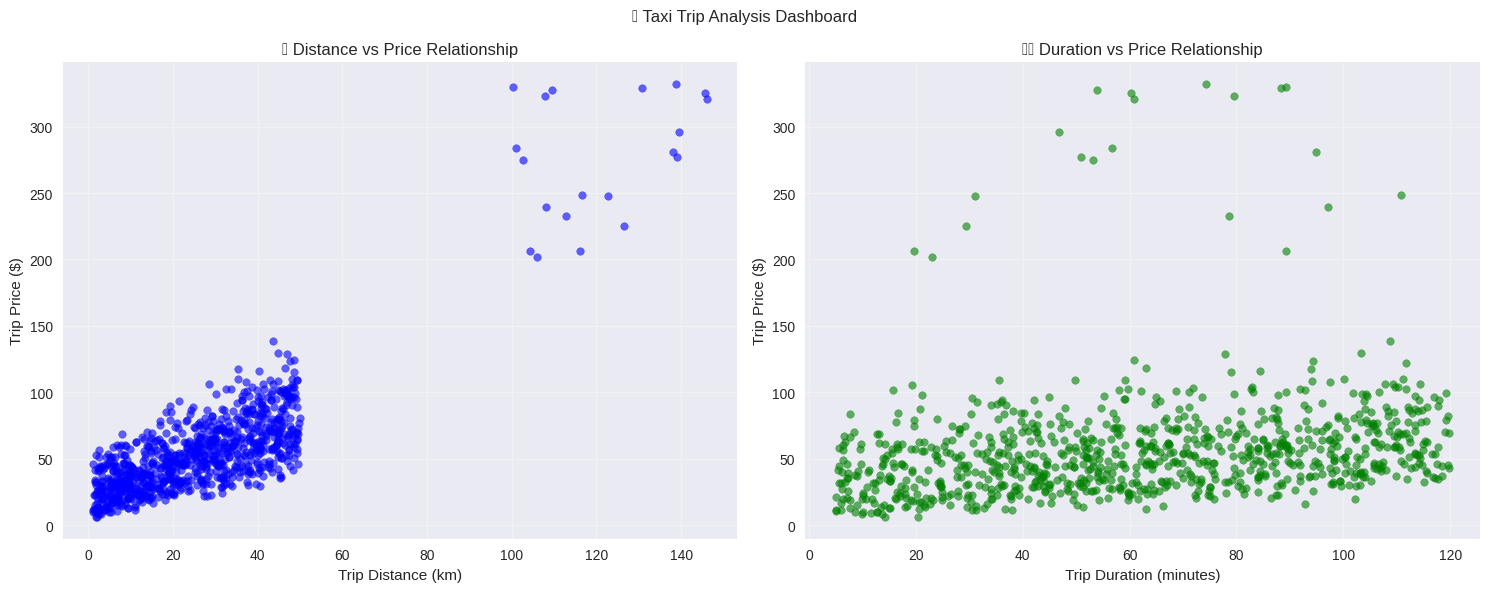

📊 What do you notice about the patterns in these charts?
💡 Both distance and duration seem to increase with price - that's perfect for linear regression!


In [ ]:
# Create visualizations to understand the data better
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('🚕 Taxi Trip Analysis Dashboard')

# 1. Scatter plot: Distance vs Price
axes[0].scatter(taxi_data['Trip_Distance_km'], taxi_data['Trip_Price'],
                alpha=0.6, color='blue', s=30)
axes[0].set_title('📏 Distance vs Price Relationship')
axes[0].set_xlabel('Trip Distance (km)')
axes[0].set_ylabel('Trip Price ($)')
axes[0].grid(True, alpha=0.3)

# 2. Scatter plot: Duration vs Price
axes[1].scatter(taxi_data['Trip_Duration_Minutes'], taxi_data['Trip_Price'],
                alpha=0.6, color='green', s=30)
axes[1].set_title('⏱️ Duration vs Price Relationship')
axes[1].set_xlabel('Trip Duration (minutes)')
axes[1].set_ylabel('Trip Price ($)')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("📊 What do you notice about the patterns in these charts?")
print("💡 Both distance and duration seem to increase with price - that's perfect for linear regression!")

# **📌 Step 6: Simple Data Cleaning**

Before building our model, let's clean our data! 🧹

In [ ]:
print("🧹 CLEANING OUR TAXI DATA:")
print("=" * 30)

# Check for missing values
print("\n❓ Checking for missing data:")
missing_data = taxi_data.isnull().sum()
print(missing_data)

if missing_data.sum() == 0:
    print("✅ Great! No missing data!")
else:
    print("⚠️ Found missing data - let's fix it!")

# Remove any outliers (trips that are too expensive or too long)
print("\n🚫 Removing unrealistic trips...")
original_size = len(taxi_data)

# Remove trips that are too expensive (over $100)
taxi_data = taxi_data[taxi_data['Trip_Price'] <= 100]

# Remove trips that are too short (under 1 minute) or too long (over 120 minutes)
taxi_data = taxi_data[(taxi_data['Trip_Duration_Minutes'] >= 1) &
                      (taxi_data['Trip_Duration_Minutes'] <= 120)]

# Remove trips that are too far (over 50 km)
taxi_data = taxi_data[taxi_data['Trip_Distance_km'] <= 50]

print(f"✅ Cleaned data: {original_size} → {len(taxi_data)} trips")
print(f"📉 Removed {original_size - len(taxi_data)} unrealistic trips")

print("\n🎉 Data cleaning complete! Our data is ready for machine learning!")

🧹 CLEANING OUR TAXI DATA:

❓ Checking for missing data:
Trip_Distance_km         50
Time_of_Day              50
Day_of_Week              50
Passenger_Count          50
Traffic_Conditions       50
Weather                  50
Base_Fare                50
Per_Km_Rate              50
Per_Minute_Rate          50
Trip_Duration_Minutes    50
Trip_Price               49
dtype: int64
⚠️ Found missing data - let's fix it!

🚫 Removing unrealistic trips...
✅ Cleaned data: 1000 → 802 trips
📉 Removed 198 unrealistic trips

🎉 Data cleaning complete! Our data is ready for machine learning!


# **📌 Step 7: Building Our First Linear Regression Model**

Time to build our AI model that predicts taxi fares! 🤖

In [ ]:
print("🤖 BUILDING OUR PREDICTION MODEL:")
print("=" * 35)

# Step 1: Choose our features (inputs) and target (output)
print("\n1️⃣ Selecting features for prediction:")

# Let's start simple - just use distance to predict price
X = taxi_data[['Trip_Distance_km']]  # Input: distance (note the double brackets!)
y = taxi_data['Trip_Price']          # Output: price

print(f"📊 Input feature: Trip Distance")
print(f"🎯 Target to predict: Trip Price")
print(f"📏 Training on {len(X)} taxi trips")

# Step 2: Split data into training and testing sets
print("\n2️⃣ Splitting data for training and testing:")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"🏋️ Training trips: {len(X_train)}")
print(f"🧪 Testing trips: {len(X_test)}")
print("💡 We'll train on 80% and test on 20% of the data")

# Step 3: Create and train our model
print("\n3️⃣ Training our linear regression model:")
model = LinearRegression()
model.fit(X_train, y_train)

print("✅ Model training complete!")
print(f"📈 The model found this relationship:")
print(f"   Price = {model.intercept_:.2f} + {model.coef_[0]:.2f} × Distance")
print(f"💡 This means each km costs ${model.coef_[0]:.2f} plus a base fare of ${model.intercept_:.2f}")

print("\n🎉 Our AI model is ready to make predictions!")

🤖 BUILDING OUR PREDICTION MODEL:

1️⃣ Selecting features for prediction:
📊 Input feature: Trip Distance
🎯 Target to predict: Trip Price
📏 Training on 802 taxi trips

2️⃣ Splitting data for training and testing:
🏋️ Training trips: 641
🧪 Testing trips: 161
💡 We'll train on 80% and test on 20% of the data

3️⃣ Training our linear regression model:
✅ Model training complete!
📈 The model found this relationship:
   Price = 24.26 + 1.05 × Distance
💡 This means each km costs $1.05 plus a base fare of $24.26

🎉 Our AI model is ready to make predictions!


# **📌 Step 8: Making Predictions**

Let's use our model to predict taxi fares! 🔮

In [ ]:
print("🔮 MAKING TAXI FARE PREDICTIONS:")
print("=" * 35)

# Make predictions on our test set
y_pred = model.predict(X_test)

print("\n📊 Sample predictions vs actual prices:")
print(f"{'Distance (km)':<12} {'Actual Price':<12} {'Predicted':<12} {'Difference':<12}")
print("-" * 50)

# Show first 10 predictions
for i in range(10):
    distance = X_test.iloc[i, 0]
    actual = y_test.iloc[i]
    predicted = y_pred[i]
    difference = abs(actual - predicted)

    print(f"{distance:<12.1f} ${actual:<11.2f} ${predicted:<11.2f} ${difference:<11.2f}")

print("\n🎯 Let's test our model with some custom predictions:")
test_distances = [5, 10, 15, 20, 25]

for distance in test_distances:
    predicted_price = model.predict([[distance]])[0]
    print(f"🚕 A {distance} km trip should cost: ${predicted_price:.2f}")

print("\n💡 These predictions are based on the pattern the AI learned from real taxi data!")

🔮 MAKING TAXI FARE PREDICTIONS:

📊 Sample predictions vs actual prices:
Distance (km) Actual Price Predicted    Difference  
--------------------------------------------------
1.8          $23.31       $26.10       $2.79       
2.1          $16.53       $26.50       $9.98       
16.9         $25.66       $42.03       $16.37      
18.4         $85.47       $43.61       $41.85      
20.5         $74.26       $45.75       $28.51      
36.7         $85.57       $62.74       $22.84      
25.6         $59.89       $51.15       $8.74       
15.4         $45.12       $40.38       $4.74       
15.0         $33.43       $40.04       $6.60       
8.4          $52.99       $33.04       $19.95      

🎯 Let's test our model with some custom predictions:
🚕 A 5 km trip should cost: $29.50
🚕 A 10 km trip should cost: $34.75
🚕 A 15 km trip should cost: $39.99
🚕 A 20 km trip should cost: $45.24
🚕 A 25 km trip should cost: $50.48

💡 These predictions are based on the pattern the AI learned from real taxi 

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# **📌 Step 9: Evaluating Our Model**

How good are our predictions? Let's find out! 📏

In [ ]:
print("📏 MODEL EVALUATION - HOW GOOD IS OUR AI?")
print("=" * 45)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"\n📊 Model Performance Metrics:")
print(f"Root Mean Square Error (RMSE): ${rmse:.2f}")
print(f"💡 This means our predictions are typically off by ${rmse:.2f}")

print(f"\nR-squared (R²) Score: {r2:.3f}")
print(f"💡 This means our model explains {r2*100:.1f}% of the price variation")

# Interpret the results
print(f"\n🎯 MODEL INTERPRETATION:")
if r2 > 0.8:
    print("🌟 EXCELLENT! Our model makes very accurate predictions!")
elif r2 > 0.6:
    print("👍 GOOD! Our model makes reasonably accurate predictions!")
elif r2 > 0.4:
    print("⚠️ OKAY! Our model has some predictive power but could be better.")
else:
    print("❌ POOR! Our model needs improvement.")

# Compare with a baseline (just guessing the average price)
baseline_prediction = np.mean(y_train)
baseline_predictions = np.full(len(y_test), baseline_prediction)
baseline_rmse = np.sqrt(mean_squared_error(y_test, baseline_predictions))

print(f"\n📊 Comparison with baseline (just guessing average):")
print(f"Our model RMSE: ${rmse:.2f}")
print(f"Baseline RMSE: ${baseline_rmse:.2f}")
improvement = ((baseline_rmse - rmse) / baseline_rmse) * 100
print(f"🚀 Our model is {improvement:.1f}% better than just guessing!")

print("\n🎉 Model evaluation complete!")

📏 MODEL EVALUATION - HOW GOOD IS OUR AI?

📊 Model Performance Metrics:
Root Mean Square Error (RMSE): $15.37
💡 This means our predictions are typically off by $15.37

R-squared (R²) Score: 0.427
💡 This means our model explains 42.7% of the price variation

🎯 MODEL INTERPRETATION:
⚠️ OKAY! Our model has some predictive power but could be better.

📊 Comparison with baseline (just guessing average):
Our model RMSE: $15.37
Baseline RMSE: $20.33
🚀 Our model is 24.4% better than just guessing!

🎉 Model evaluation complete!


# **📌 Step 10: Visualizing Our Model**

Let's see how well our model fits the data! 📈

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/tmp/ipython-input-10-3705762467.py:34: UserWarning: Glyph 128207 (\N{STRAIGHT RULER}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-10-3705762467.py:34: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-10-3705762467.py:34: UserWarning: Glyph 129302 (\N{ROBOT FACE}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128207 (\N{STRAIGHT RULER}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(

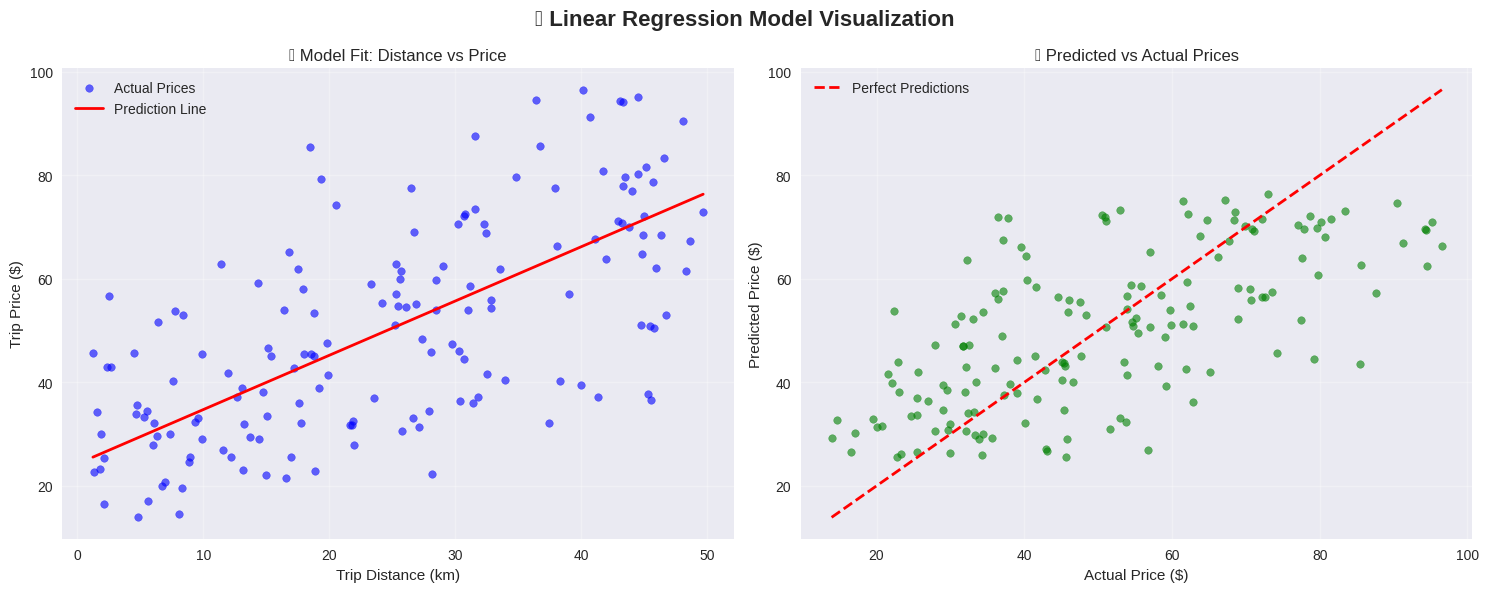

📊 Interpretation:
• Left chart: Red line shows our model's predictions
• Right chart: Points closer to the diagonal line = better predictions
• The closer the points to the red line, the better our model!


In [ ]:
# Create visualizations to show our model performance
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('🤖 Linear Regression Model Visualization', fontsize=16, fontweight='bold')

# 1. Model fit visualization
# Plot the actual data points
axes[0].scatter(X_test, y_test, alpha=0.6, color='blue', label='Actual Prices', s=30)

# Plot the model's prediction line
X_range = np.linspace(X_test.min(), X_test.max(), 100).reshape(-1, 1)
y_range_pred = model.predict(X_range)
axes[0].plot(X_range, y_range_pred, color='red', linewidth=2, label='Prediction Line')

axes[0].set_title('📏 Model Fit: Distance vs Price')
axes[0].set_xlabel('Trip Distance (km)')
axes[0].set_ylabel('Trip Price ($)')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# 2. Predicted vs Actual prices
axes[1].scatter(y_test, y_pred, alpha=0.6, color='green', s=30)

# Perfect prediction line (diagonal)
perfect_line = np.linspace(y_test.min(), y_test.max(), 100)
axes[1].plot(perfect_line, perfect_line, color='red', linestyle='--',
             linewidth=2, label='Perfect Predictions')

axes[1].set_title('🎯 Predicted vs Actual Prices')
axes[1].set_xlabel('Actual Price ($)')
axes[1].set_ylabel('Predicted Price ($)')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("📊 Interpretation:")
print("• Left chart: Red line shows our model's predictions")
print("• Right chart: Points closer to the diagonal line = better predictions")
print("• The closer the points to the red line, the better our model!")

# **🎯 YOUR TURN: Linear Regression Challenges!**

Now it's time to practice and improve our model! 💪

## **📝 Exercise 1: Multiple Feature Model**

In [ ]:
# TODO: Build a better model using multiple features!
print("🎯 CHALLENGE 1: Multi-Feature Linear Regression")
print("=" * 45)

# TODO: Use both distance AND duration to predict price
print("\n📊 Task: Use distance AND duration to predict taxi fares")

# Step 1: Create features with multiple columns
X_multi = taxi_data[[, ]]  # TODO: Add both features
y_multi = taxi_data[]


# Step 2: Split the data


# Step 3: Train the multi-feature model


# Step 4: Make predictions and evaluate


print("\n✅ Challenge 1 Complete!")

# **🎉 Congratulations!**

You've successfully built your first **Linear Regression Model**! 🎓

## **🏆 What You Accomplished:**
- ✅ **Loaded real-world data** from Kaggle taxi trips
- ✅ **Explored relationships** between distance, time, and price
- ✅ **Cleaned and prepared** data for machine learning
- ✅ **Built your first AI model** using linear regression
- ✅ **Made predictions** about taxi fares
- ✅ **Evaluated model performance** with proper metrics
- ✅ **Experimented with multiple features** to improve accuracy
- ✅ **Created a taxi fare calculator** using your model!

## **🔍 Key Concepts You Learned:**
- 🧮 **Linear Regression:** Finding the best line through data points
- 📊 **Features & Targets:** Input variables (distance) and output predictions (price)
- ✂️ **Train-Test Split:** Using part of data for training, part for testing
- 📏 **Model Evaluation:** RMSE and R² scores to measure accuracy
- 🎯 **Prediction:** Using trained models to estimate new values

## **🚀 Real-World Applications:**
Linear regression is used in:
- 🚗 **Ride-sharing apps** (Uber, Lyft, Careem) for fare estimation
- 🏠 **Real estate** for property price prediction
- 💰 **Finance** for stock price analysis
- 📈 **Business** for sales forecasting
- 🌡️ **Science** for trend analysis and predictions

## **🎯 What's Next in Your ML Journey:**
1. **More advanced models:** Polynomial regression, decision trees
2. **Classification problems:** Predicting categories instead of numbers
3. **Deep learning:** Neural networks and AI
4. **Computer vision:** Teaching AI to see
5. **Natural language processing:** Teaching AI to understand text

## **💡 Pro Tips for Future ML Projects:**
- 🧹 **Always clean your data** - garbage in, garbage out!
- 📊 **Visualize first** - charts reveal hidden patterns
- 🎯 **Start simple** - basic models often work surprisingly well
- 📏 **Always evaluate** - numbers don't lie about performance
- 🔄 **Iterate and improve** - ML is about continuous improvement

---

**"The best way to predict the future is to create it with data."**

**You've just created your first predictive model! 🤖✨**

---

### 🧠 **Created for KAUST Academy**
### 👨‍🏫 **Introduction to AI Program - Machine Learning Module**
### 🤖 **Linear Regression Fundamentals**

**Keep building, keep predicting! 🚕💙**

---

## **🎯 Next Challenge Ideas:**
- Build a house price predictor
- Create a student grade predictor
- Analyze stock market trends
- Predict sports game scores
- Estimate weather patterns

**🌟 Remember: Every expert was once a beginner. You've just taken your first step into the world of AI!**